Number of keypoints: 67
Descriptor shape: (67, 128)


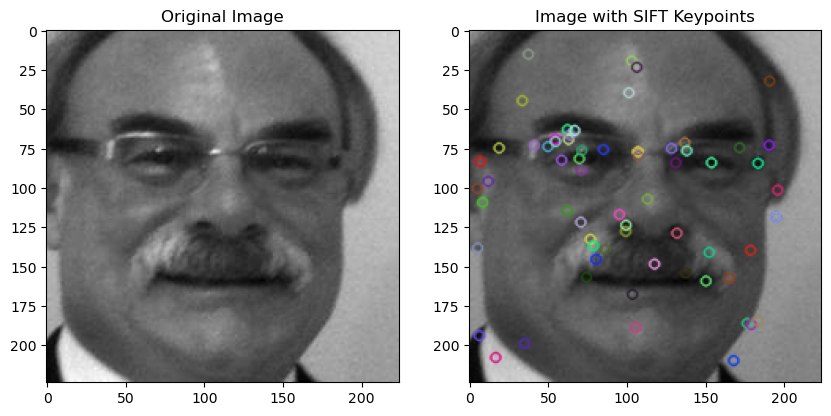

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load an image
image_path = 'D:\\tesr\\train_set\\images\\0.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(image, None)
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Print number of keypoints and descriptor shape
print("Number of keypoints:", len(keypoints))
print("Descriptor shape:", descriptors.shape)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(image_with_keypoints), plt.title('Image with SIFT Keypoints')
plt.show()

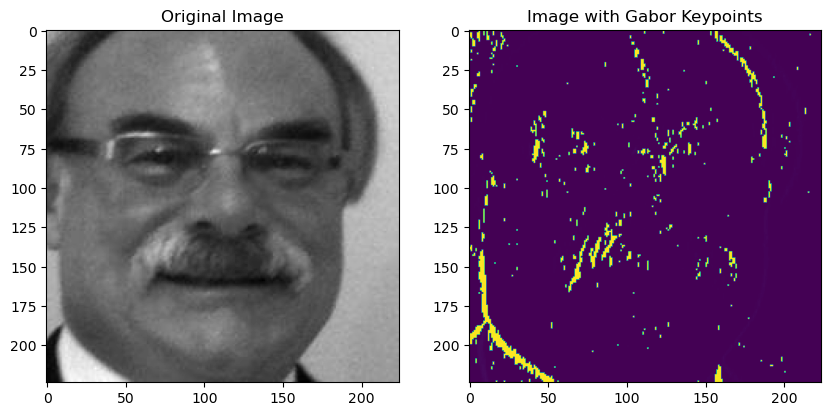

In [4]:
from skimage.filters import gabor
from skimage import data, io
from matplotlib import pyplot as plt
# detecting edges in a coin image
filt_real, filt_imag = gabor(image, frequency=0.6)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(filt_imag), plt.title('Image with Gabor Keypoints')
plt.show()

# plt.figure()
# io.imshow(filt_real)
# io.show()
# # less sensitivity to finer details with the lower frequency kernel
# filt_real, filt_imag = gabor(image, frequency=0.1)
# plt.figure()
# io.imshow(filt_real)
# io.show()

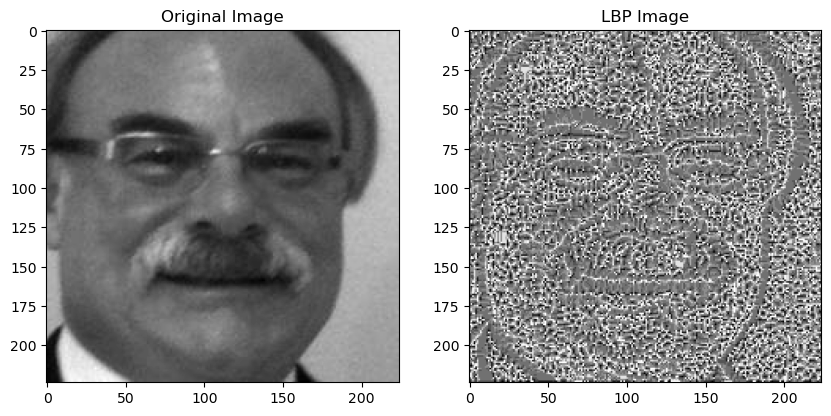

In [5]:
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

# Load image
# Compute LBP image
radius = 1
n_points = 8 * radius
lbp_image = local_binary_pattern(image, n_points, radius, method='uniform')

# Visualize LBP image
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(lbp_image, cmap='gray'), plt.title('LBP Image')
plt.show()

In [6]:
import cv2
import numpy as np
from scipy import ndimage as ndi
from skimage.feature import local_binary_pattern

# Load an image

# Define Gabor filter parameters
frequency = 0.6
theta = 45.0
sigma = 2.0
gamma = 1.0

# Create Gabor filter
kernel = cv2.getGaborKernel((9, 9), sigma, theta, frequency, gamma)

# Apply Gabor filter to the image
filtered_image = cv2.filter2D(image, cv2.CV_64F, kernel)

# Calculate LBP features on the filtered image
radius = 1
n_points = 8 * radius
lbp_image = local_binary_pattern(filtered_image, n_points, radius, method='uniform')

# Flatten the LBP image to obtain features
lbp_features = np.histogram(lbp_image.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))[0]
lbp_features = lbp_features / np.sum(lbp_features)  # Normalize

# Print LBP features
print("LBP Features:", lbp_features)

LBP Features: [0.1154536  0.21785316 0.01137994 0.01797672 0.09042172 0.017897
 0.01072226 0.21922832 0.11507494 0.18399235]


D:\anaconda3\Lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


In [7]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern

# Load an image

# Calculate LBP features
radius = 1
n_points = 8 * radius
lbp_image = local_binary_pattern(image, n_points, radius, method='uniform')

# Flatten the LBP image to obtain features
lbp_features = np.histogram(lbp_image.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))[0]
lbp_features = lbp_features / np.sum(lbp_features)  # Normalize

# Print LBP features
print("LBP Features:", lbp_features)

LBP Features: [0.02208227 0.05333227 0.04701451 0.14305644 0.24453922 0.19230309
 0.0944874  0.06088568 0.06413425 0.07816486]
